# Logistic Regression

In this notebook I will be training a logistic regression on our combined dataset of clinical and gene expressions datasets. Before we train the model it is important that we first scale, feature select and process the dataset as needed.

In [1]:
import pandas as pd

In [2]:
data_df = pd.read_csv("data.csv")

In [3]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1973 entries, 0 to 1972
Columns: 20641 entries, RERE to HISTOLOGICAL_SUBTYPE_Unknown
dtypes: bool(23), float64(20609), int64(8), object(1)
memory usage: 310.4+ MB


In [4]:
data_df.head()

,RERE,RNF165,PHF7,CIDEA,TENT2,SLC17A3,SDS,ATP6V1C2,F3,FAM71C,...,LATERALITY_Right,LATERALITY_Unknown,HISTOLOGICAL_SUBTYPE_Lobular,HISTOLOGICAL_SUBTYPE_Medullary,HISTOLOGICAL_SUBTYPE_Metaplastic,HISTOLOGICAL_SUBTYPE_Mixed,HISTOLOGICAL_SUBTYPE_Mucinous,HISTOLOGICAL_SUBTYPE_Other,HISTOLOGICAL_SUBTYPE_Tubular/ cribriform,HISTOLOGICAL_SUBTYPE_Unknown
0,8.676978,6.075331,5.838270,6.397503,7.906217,5.702379,6.930741,5.332863,5.275676,5.443896,...,False,False,False,False,False,False,False,False,False,False
1,9.653589,6.687887,5.600876,5.246319,8.267256,5.521794,6.141689,7.563477,5.376381,5.319857,...,False,False,False,False,False,False,False,False,False,False
2,9.033589,5.910885,6.030718,10.111816,7.959291,5.689533,6.529312,5.482155,5.463788,5.254294,...,True,False,False,False,False,False,False,False,False,False
3,8.814855,5.628740,5.849428,6.116868,9.206376,5.439130,6.430102,5.398675,5.409761,5.512298,...,True,False,False,False,False,False,False,False,False,False
4,8.736406,6.392422,5.542133,5.184098,8.162845,5.464326,6.105427,5.026018,5.338580,5.430874,...,True,False,False,False,False,False,False,False,False,False


In [5]:
data_df.isnull().sum().any()

np.False_

In [6]:
data_df.sample(5)

,RERE,RNF165,PHF7,CIDEA,TENT2,SLC17A3,SDS,ATP6V1C2,F3,FAM71C,...,LATERALITY_Right,LATERALITY_Unknown,HISTOLOGICAL_SUBTYPE_Lobular,HISTOLOGICAL_SUBTYPE_Medullary,HISTOLOGICAL_SUBTYPE_Metaplastic,HISTOLOGICAL_SUBTYPE_Mixed,HISTOLOGICAL_SUBTYPE_Mucinous,HISTOLOGICAL_SUBTYPE_Other,HISTOLOGICAL_SUBTYPE_Tubular/ cribriform,HISTOLOGICAL_SUBTYPE_Unknown
152,9.366018,5.650750,6.259631,6.159578,8.591202,5.511711,5.663129,6.628115,5.716197,5.275462,...,False,False,False,False,False,True,False,False,False,False
1877,8.857803,5.905067,5.897544,7.085790,7.621238,5.555944,7.210305,5.701804,5.640626,5.378769,...,True,False,False,False,False,True,False,False,False,False
688,9.202403,5.905330,5.899989,8.632565,8.103844,5.475613,7.214769,5.188097,6.031927,5.371140,...,False,False,False,False,False,False,False,False,False,False
363,8.867115,6.168348,5.416418,6.079841,8.625954,5.770413,6.599371,5.241658,5.826576,5.359722,...,False,False,False,False,False,False,False,False,False,False
1129,9.177753,6.797672,6.073793,9.304680,8.202645,5.770218,5.745549,5.306497,6.709079,5.733502,...,False,False,True,False,False,False,False,False,False,False


In [7]:
data_df["CLAUDIN_SUBTYPE"].unique()

array(['LumA', 'Her2', 'LumB', 'claudin-low', 'Basal', 'Normal'],
      dtype=object)

In [8]:
data_df_processed = data_df.copy()

In [9]:
leakage_cols = [
    "OS_MONTHS",
    "OS_STATUS",
    "RFS_MONTHS",
    "RFS_STATUS"
]

data_df_processed = data_df_processed.drop(columns=leakage_cols)

These columns were removed because of data leakage.

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = data_df_processed.drop(columns=["CLAUDIN_SUBTYPE"])
y = data_df_processed["CLAUDIN_SUBTYPE"]

X , y

(          RERE    RNF165      PHF7      CIDEA     TENT2   SLC17A3       SDS  \
 0     8.676978  6.075331  5.838270   6.397503  7.906217  5.702379  6.930741   
 1     9.653589  6.687887  5.600876   5.246319  8.267256  5.521794  6.141689   
 2     9.033589  5.910885  6.030718  10.111816  7.959291  5.689533  6.529312   
 3     8.814855  5.628740  5.849428   6.116868  9.206376  5.439130  6.430102   
 4     8.736406  6.392422  5.542133   5.184098  8.162845  5.464326  6.105427   
 ...        ...       ...       ...        ...       ...       ...       ...   
 1968  9.606915  7.427494  5.927409   5.927031  8.520545  5.550549  5.841476   
 1969  9.049296  6.850000  6.117095   6.374305  8.499637  5.497546  6.351428   
 1970  8.858622  6.550450  5.936371   5.963092  9.320207  5.690297  7.280037   
 1971  8.415867  6.831722  7.408960   9.181768  6.804085  5.730308  7.642485   
 1972  9.902776  7.338318  5.875759   5.596873  8.436732  5.788639  5.977119   
 
       ATP6V1C2        F3    FAM71C  .

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
label_encoder = LabelEncoder()

In [15]:
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [16]:
y_train_encoded

array([1, 3, 2, ..., 3, 3, 4], shape=(1578,))

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression

Since there are aproximatelly 20000 genes and around 1980 patients, we can't directly train a model like this. We need to do feature selection to avoid overfitting.

In the next section I will be making a pipeline where i scale the features and use SelectKBest with a parameter f_classif (ANOVA F-Value) and k=500.

## Pipeline and training

In [18]:
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("feature_selection", SelectKBest(f_classif, k=500)),
    ("classifier", LogisticRegression(
        multi_class="multinomial",
        solver="lbfgs",
        max_iter=2000,
        class_weight="balanced"
    ))
])

In [19]:
pipeline.fit(X_train, y_train_encoded)

C:\Users\marij\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


,steps,"[('scaler', ...), ('feature_selection', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,score_func,<function f_c...002A503617A60>
,k,500
,penalty,'l2'
,dual,False


# Grid Search

In [20]:
from sklearn.model_selection import GridSearchCV

In [21]:
param_gird = {
    "feature_selection__k": [300, 500, 800, 1000],
    "classifier__C": [0.01, 0.1, 1, 10]
}

grid = GridSearchCV(
    pipeline,
    param_gird,
    cv=5,
    scoring="f1_weighted",
    n_jobs=-1
)

grid.fit(X_train, y_train_encoded)

C:\Users\marij\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


,estimator,Pipeline(step...ltinomial'))])
,param_grid,"{'classifier__C': [0.01, 0.1, ...], 'feature_selection__k': [300, 500, ...]}"
,scoring,'f1_weighted'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


In [22]:
best_model = grid.best_estimator_
print(grid.best_params_)

{'classifier__C': 0.1, 'feature_selection__k': 500}


## Predicting

In [23]:
y_pred = best_model.predict(X_test)

In [24]:
from sklearn.metrics import classification_report

In [25]:
print(classification_report(y_test_encoded, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82        42
           1       0.67      0.64      0.66        45
           2       0.86      0.76      0.81       140
           3       0.77      0.86      0.81        95
           4       0.55      0.72      0.63        29
           5       0.87      0.75      0.80        44

    accuracy                           0.78       395
   macro avg       0.75      0.77      0.75       395
weighted avg       0.79      0.78      0.78       395



### Confusion Matrix + Visualization

In [26]:
import matplotlib.pylab as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

<Figure size 800x800 with 0 Axes>

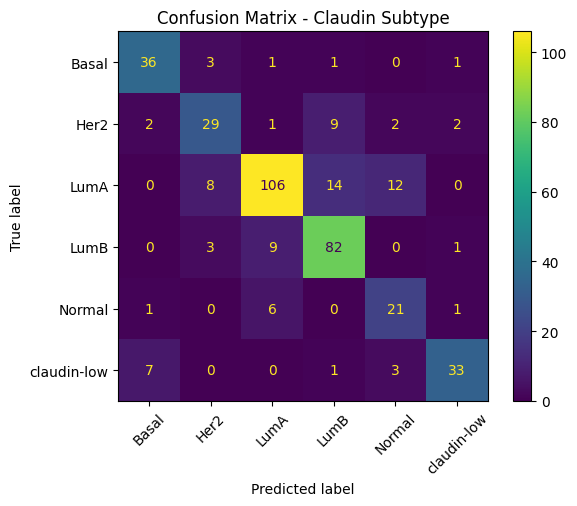

In [27]:
cm = confusion_matrix(y_test_encoded, y_pred)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=label_encoder.classes_
)

plt.figure(figsize=(8,8))
disp.plot(xticks_rotation=45)
plt.title("Confusion Matrix - Claudin Subtype")
plt.show()

The matrix shows that the model is getting confused and here is why I think why:

LumA vs. LumB: This is the biggest challenge. We have 14 cases where LumA is predicted as LumB, and 12 cases where it is predicted as Normal. This is a classical problem because these subtypes are in the same biological continuum.

Her2: The model has significant overlap with LumB (9 cases). This suggests that the model may be relying too heavily on proliferation genes that are common to both types.

Basal and Claudin-low: The model recognizes them relatively well, which makes sense since they are genetically much more distinct than the Luminal groups.

Let's see the best features selected

## Gene Importance

In [28]:
selector = best_model.named_steps["feature_selection"]
model = best_model.named_steps["classifier"]

In [29]:
selected_features = X_train.columns[selector.get_support()]

In [30]:
import numpy as np

In [31]:
coefficients = model.coef_
avg_importance = np.mean(np.abs(coefficients), axis=0)

In [32]:
gene_importance = pd.DataFrame({
    "Gene": selected_features,
    "Importance": avg_importance
})

gene_importance = gene_importance.sort_values(
    by="Importance",
    ascending=False
)

print(gene_importance.head(20))

        Gene  Importance
234    KRT17    0.183463
311    KRT14    0.158245
497  SLC39A6    0.152969
148    KRT6B    0.148092
239    MPZL2    0.143776
349  FAM107A    0.138551
71      EGFR    0.137131
498   ER_IHC    0.136885
128    SIAH2    0.135761
450    SFRP1    0.134928
372     KRT5    0.134409
410     NAT1    0.130744
340    RFWD3    0.127653
26     REEP5    0.126919
313  CREB3L4    0.125510
247     OSR1    0.123764
143   SMIM14    0.123685
55     ENPP2    0.123448
321    FOXC1    0.123179
59      FUT3    0.122542


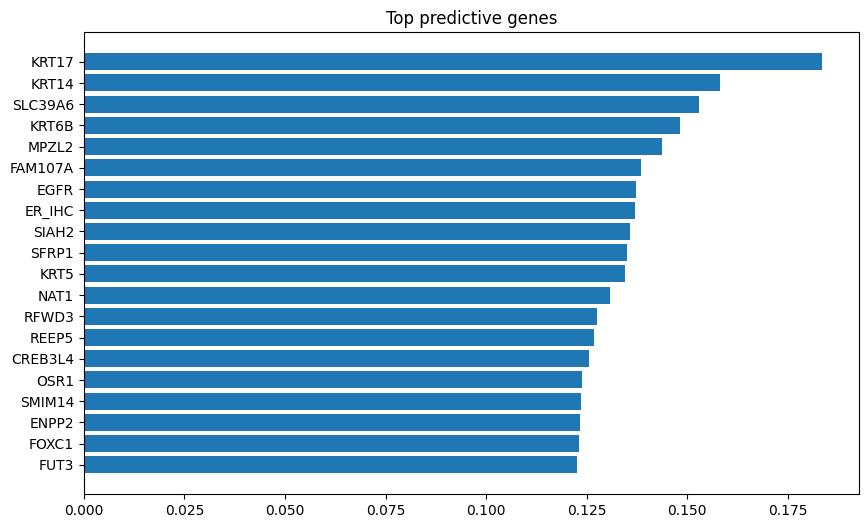

In [33]:
top_genes = gene_importance.head(20)

plt.figure(figsize=(10,6))
plt.barh(top_genes["Gene"], top_genes["Importance"])
plt.gca().invert_yaxis()
plt.title("Top predictive genes")
plt.show()

The list of genes you is excellent and confirms that the model is learning real biology:

KRT17, KRT14, KRT5: These are basal keratins. Their high importance explains why the model recognizes the Basal subtype well.

EGFR: A key marker for triple negative/basal cancer.

SLC39A6 (LIV-1) and NAT1: These are classic markers for estrogen-positive (Luminal) cancer.

ER_IHC: The fact that this clinical parameter is in the top 10 shows that clinical data helps, but genes dominate the weight.

In [34]:
!pip install shap

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [35]:
!pip show shap

Name: shap
Version: 0.50.0
Summary: A unified approach to explain the output of any machine learning model.
Home-page: 
Author: 
Author-email: Scott Lundberg <slund1@cs.washington.edu>
License: MIT License
Location: C:\Users\marij\AppData\Roaming\Python\Python314\site-packages
Requires: cloudpickle, llvmlite, numba, numpy, packaging, pandas, scikit-learn, scipy, slicer, tqdm, typing-extensions
Required-by: 


In [36]:
import sys
!{sys.executable} -m pip install shap --upgrade


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: C:\Users\marij\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip


In [37]:
import shap

In [38]:
X_train_transformed = best_model[:-1].transform(X_train)
X_train_transformed = best_model[:-1].transform(X_test)

In [39]:
explainer = shap.LinearExplainer(
    best_model.named_steps["classifier"],
    X_train_transformed
)

In [40]:
shap_values = explainer.shap_values(X_train_transformed)

In [41]:
selector = best_model.named_steps["feature_selection"]

feature_names = X_train.columns[selector.get_support()]

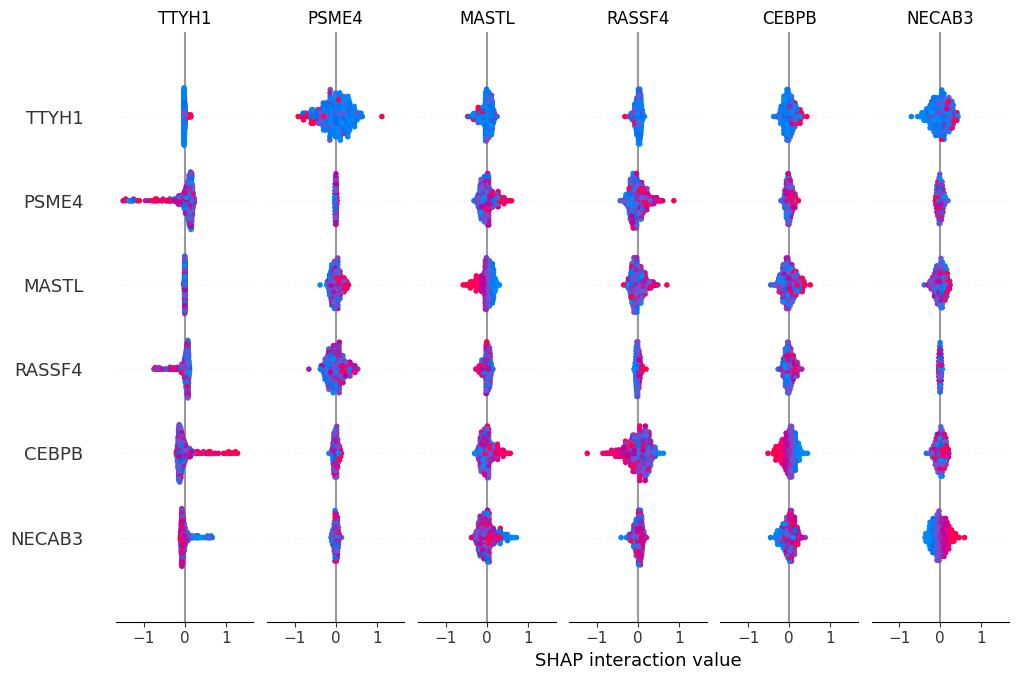

In [42]:
shap.summary_plot(shap_values, X_train_transformed, feature_names=feature_names)

The SHAP plot(interaction values) shows how genes influence each other:

Genes like TTYH1 and CEBPB show interesting interactions. CEBPB is known for its role in breast cell differentiation and is often associated with aggressive subtypes.

The horizontal “stretching” of the points at PSME4 and RASSF4 indicates that these genes have a large variability in their impact on prognosis depending on their expression

## Hyperparameter Tuning

My last solver only worked with L2. Now, I am going to use 'SAGA' which will allow me to test L1 regularization as a "smarter" option when we have a lot of columns (genes) and very little rows (patients).

Before I got C: 0.1, now I will test values around that value so find the "sweet spot" where the model doesn't overfit.

Now, if L1 wins, that means that a small part of those 500-800 chosen genes were reallt relavent, which is great for the biologcial interpretation.

In [44]:
param_gird2 = {
    "feature_selection__k": [300,500,800,1200],
    "classifier__C": [0.05, 0.5, 0.01],
    "classifier__penalty": ["l1", "l2"],
    "classifier__class_weight": ["balanced", None]
}

In [45]:
grid = GridSearchCV(
    pipeline2,
    param_gird2,
    cv=5,
    scoring="f1_weighted",
    n_jobs=-1,
    verbose=2
)

grid.fit(X_train, y_train_encoded)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


C:\Users\marij\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


,estimator,Pipeline(step...ver='saga'))])
,param_grid,"{'classifier__C': [0.05, 0.5, ...], 'classifier__class_weight': ['balanced', None], 'classifier__penalty': ['l1', 'l2'], 'feature_selection__k': [300, 500, ...]}"
,scoring,'f1_weighted'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


In [46]:
best_model2 = grid.best_estimator_

print("Bets parameters:")
print(grid.best_params_)

Bets parameters:
{'classifier__C': 0.01, 'classifier__class_weight': None, 'classifier__penalty': 'l2', 'feature_selection__k': 1200}


In [47]:
y_pred = best_model2.predict(X_test)

print(classification_report(y_test_encoded, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        42
           1       0.74      0.71      0.73        45
           2       0.82      0.83      0.82       140
           3       0.78      0.84      0.81        95
           4       0.69      0.69      0.69        29
           5       0.94      0.73      0.82        44

    accuracy                           0.81       395
   macro avg       0.80      0.78      0.79       395
weighted avg       0.81      0.81      0.80       395



<Figure size 800x800 with 0 Axes>

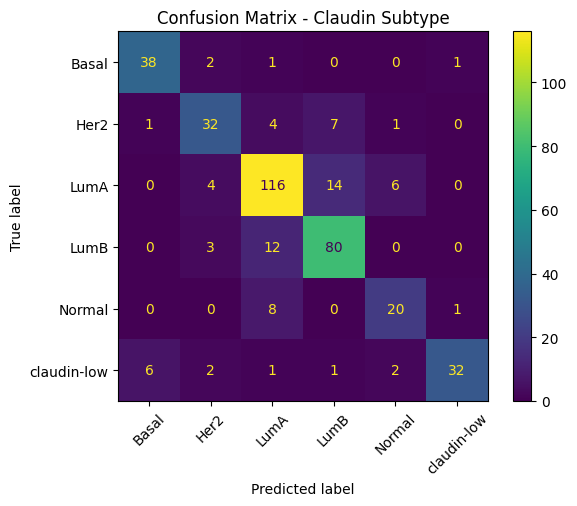

In [48]:
cm2 = confusion_matrix(y_test_encoded, y_pred)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm2,
    display_labels=label_encoder.classes_
)

plt.figure(figsize=(8,8))
disp.plot(xticks_rotation=45)
plt.title("Confusion Matrix - Claudin Subtype")
plt.show()

Here, there is still confusion with the genes LumA and LumB even tho the accuracy increased.

In [49]:
X_train_transformed = best_model2[:-1].transform(X_train)
X_train_transformed = best_model2[:-1].transform(X_test)

In [50]:
explainer2 = shap.LinearExplainer(
    best_model2.named_steps["classifier"],
    X_train_transformed
)

In [51]:
shap_values2 = explainer2.shap_values(X_train_transformed)

In [52]:
selector2 = best_model2.named_steps["feature_selection"]

feature_names2 = X_train.columns[selector2.get_support()]

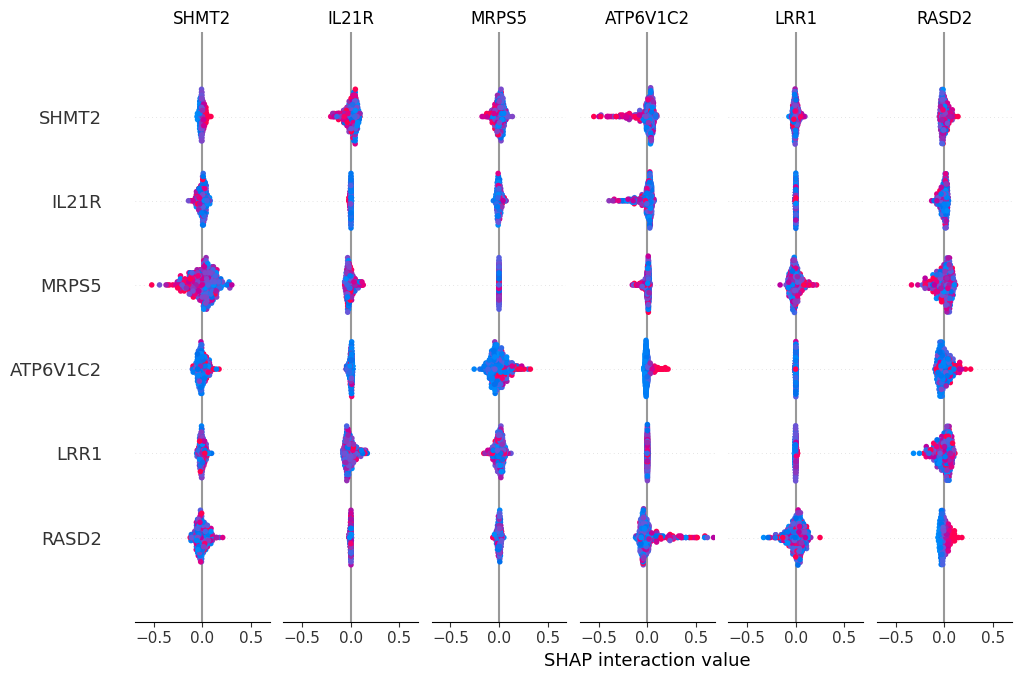

In [53]:
shap.summary_plot(shap_values2, 
                  X_train_transformed, feature_names=feature_names2)

What I can finnaly tell as a conlusion is that not only the genes play part in predicting the subtype but also some clinical data. For example, the ER_HIC feature from the clinical data.

In [57]:
log_model = best_model.named_steps["classifier"]

mask = best_model.named_steps["feature_selection"].get_support()
selected_features = X.columns[mask]

abs_weights = np.abs(log_model.coef_).mean(axis=0)
important_df = pd.DataFrame({
    "Gene": selected_features,
    "Importance": abs_weights
}).sort_values(by="Importance", ascending=False)

top_50 = important_df.head(50)
top_50

,Gene,Importance
234,KRT17,0.183463
311,KRT14,0.158245
497,SLC39A6,0.152969
148,KRT6B,0.148092
239,MPZL2,0.143776
349,FAM107A,0.138551
71,EGFR,0.137131
498,ER_IHC,0.136885
128,SIAH2,0.135761
450,SFRP1,0.134928


When we put these 50 genes from Logistic Regression against those from PAM50 list, we see that Logistic Regression has a more “classical” oncology view.

Here is the detailed analysis and why it si interesting:
How many of these genes are in PAM50?

From my list of 50 genes from Logistic Regression, the following are directly part of PAM50:
KRT17 (Top 1 in Logistic), KRT14, EGFR, SFRP1, KRT5, NAT1, FOXC1, CDH3, ESR1, MIA, ANLN (probably here under a different name or in a wider selection)

Although some genes are not in PAM50, they are biologically identical to their targets:
-SLC39A6 (LIV-1): Not in PAM50, but is one of the strongest markers for Luminal A. The model found it to be a better surrogate for some of the PAM50 genes.
-AZGP1: An excellent marker for breast differentiation.
-ER_IHC: This is the clinical gold standard for Estrogen Receptor. Logistic correctly uses it as an “anchor”.

Final “hits” calculation (Overlap)
Model Hits in PAM50 (direct) Main biological feature
Logistic Reg ~10-12 genes (identity focus) “What tissue type did it come from?”